In [44]:
import processing as pro
import fitting as fit
import visualize as vis
import peaks as pks
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [56]:
def plot_xps(raman_shift, intensity, peaks=None, labels=None, mtl_name=None):
    """
    Plots the Raman spectrum, alongside peak information.

    Inputs:
    - raman_shift: Array containing Raman shift values.
    - intensity: Array containing Respective intensity values.
    - peaks: Dictionary containing peaks data, if it exists.
    - labels: User created list containing labels, left to right, of expected peaks, if it exists.
    - mtl_name: User created string labelling name of plotted material, if it exists.
    
    """
    plt.figure(figsize=(11, 6))
    plt.plot(raman_shift, intensity, color='red')    
    plt.xlabel('Binding Energy (eV)')
    plt.ylabel('Intensity (a.u.)')
    if mtl_name:
        plt.title(f"{mtl_name}")
    plt.show()

In [57]:
file_path = "../Raman/Cs1.xlsx"  

In [58]:
x, y, df, yx = pro.read_raman_data(file_path, 1, csv=False, map=False)

Reading Excel file...


,eV,counts
0,299.975,2746.6665
1,299.950,2700.0000
2,299.925,2693.3333
3,299.900,2670.0000
4,299.875,2806.6665
...,...,...
994,275.125,2713.3333
995,275.100,2690.0000
996,275.075,2700.0000
997,275.050,2683.3333


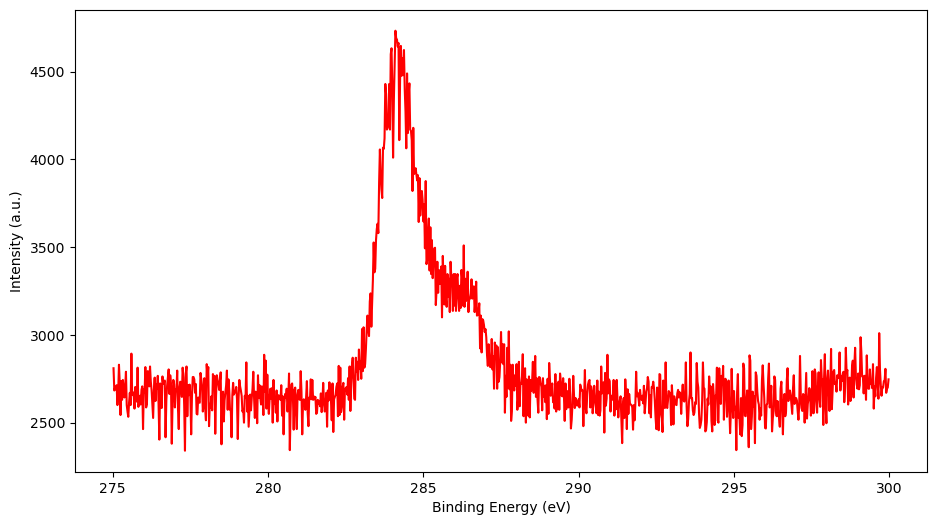

In [59]:
plot_xps(x,y)

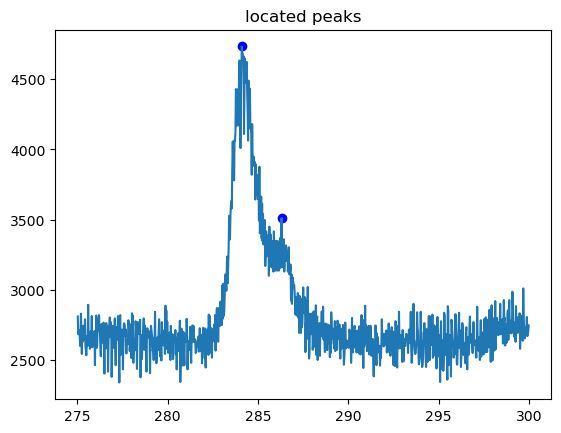

In [68]:
peaks = pks.identify_peaks(x, y, 3100, 50)

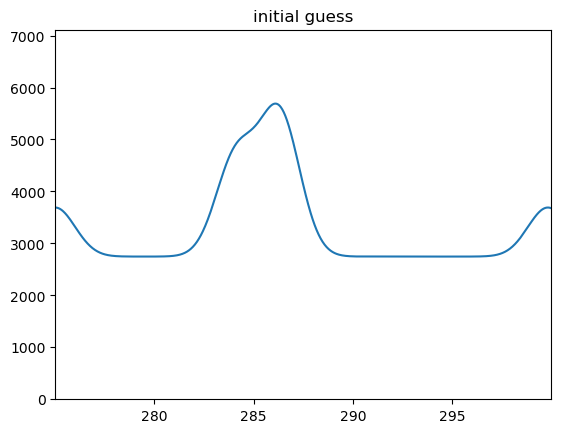

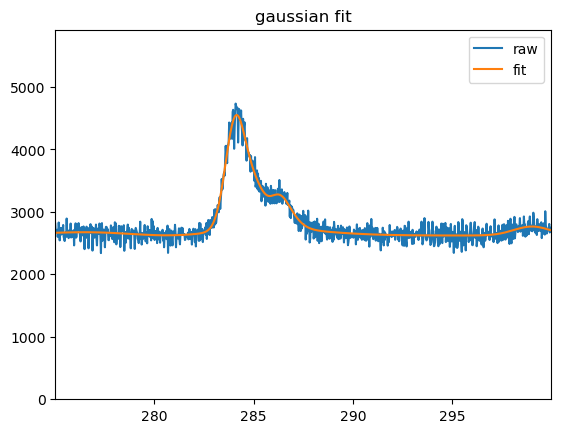

R^2 score: 0.9366688268254968


In [73]:
gy, g_r2 = fit.raman_gfitter(x, y, peaks)

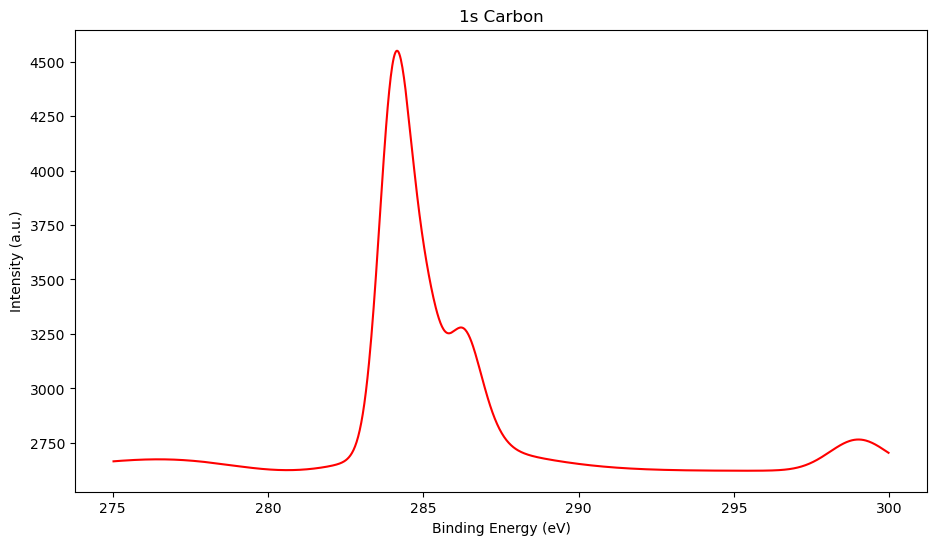

In [77]:
plot_xps(x,gy, mtl_name = "1s Carbon")

In [ ]:
#Fitting this curve with two separate gaussians is coming up next